In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True

<span style="color:red">**Question 1**                                                                                                                        
1. <span style="color:red">Write a Python function to compute the canonical Maxwell–Boltzmann partition function of a 2-level system with energies $\epsilon$ and $2\epsilon$ as a function of $k_B T$.                                                                                                                                     
   <span style="color:red">Generate an array for $k_B T$. (Students must be encouraged to find an appropriate range and increment for this array).<span style="color:red">                                     
2. <span style="color:red">Calculate the partition function $Z$ as another array using the above function.                                                                             
3. <span style="color:red">From the partition function calculate the following quantities and plot each of them as a function of $k_B T$ :                                        
   (a) Internal energy $U$,                                                                                                                                   
   (b) Energy fluctuation $\Delta E$,                                                                                                                                   
   (c) Specific heat at constant volume $C_V$,                                                                                                                                   
   (d) Free energy $F$,                                                                                                                                   
   (e) Entropy $S$.                                                                                                                                           
4. <span style="color:red">Finally, show how the occupation numbers of the states vary with temperature.                                                                                                                                   
   (You may take the value of $\epsilon = 1$).



For a 2-level system,                                                                                                                                          
Let $E_0=\epsilon,\; E_1=2\epsilon,\; \beta=\frac{1}{k_B T}$.                                                                                                 
**Partition function** :

$$
Z(\beta)=e^{-\beta\epsilon}+e^{-2\beta\epsilon}=e^{-\beta\epsilon}\bigl(1+e^{-\beta\epsilon}\bigr).
$$

**Occupation probabilities** :

$$
p_0=\frac{e^{-\beta\epsilon}}{Z}=\frac{1}{1+e^{-\beta\epsilon}},\qquad
p_1=\frac{e^{-2\beta\epsilon}}{Z}=\frac{e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

**Internal energy** $U=\langle E\rangle$:

$$
U=\frac{\epsilon e^{-\beta\epsilon}+2\epsilon e^{-2\beta\epsilon}}{Z}
= \epsilon\frac{1+2e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

Expectation of $E^2$:

$$
\langle E^2\rangle=\frac{\epsilon^2 e^{-\beta\epsilon} + (2\epsilon)^2 e^{-2\beta\epsilon}}{Z}
=\epsilon^2\frac{1+4e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

**Energy fluctuation** and **standard deviation** :

$$
\Delta E^2=\langle E^2\rangle - \langle E\rangle^2,
\qquad
\Delta E=\sqrt{\Delta E^2}.
$$

Using the forms above you can expand algebraically if desired.

**Specific heat** (at constant volume) :

$$
C_V=\frac{\partial U}{\partial T}=\frac{\Delta E^2}{k_B T^2}.
$$

**Free energy** :

$$
F=-k_B T\ln Z = -k_B T\left(-\beta\epsilon + \ln(1+e^{-\beta\epsilon})\right)
= \epsilon - k_B T\ln(1+e^{-\beta\epsilon}).
$$

(Using $\ln Z = -\beta\epsilon + \ln(1+e^{-\beta\epsilon})$.)

**Entropy** :

$$
S=\frac{U-F}{T} = \frac{U - (\epsilon - k_B T\ln(1+e^{-\beta\epsilon}))}{T}.
$$


$$
\frac{S}{k_B} = -p_0\ln p_0 - p_1\ln p_1 .
$$

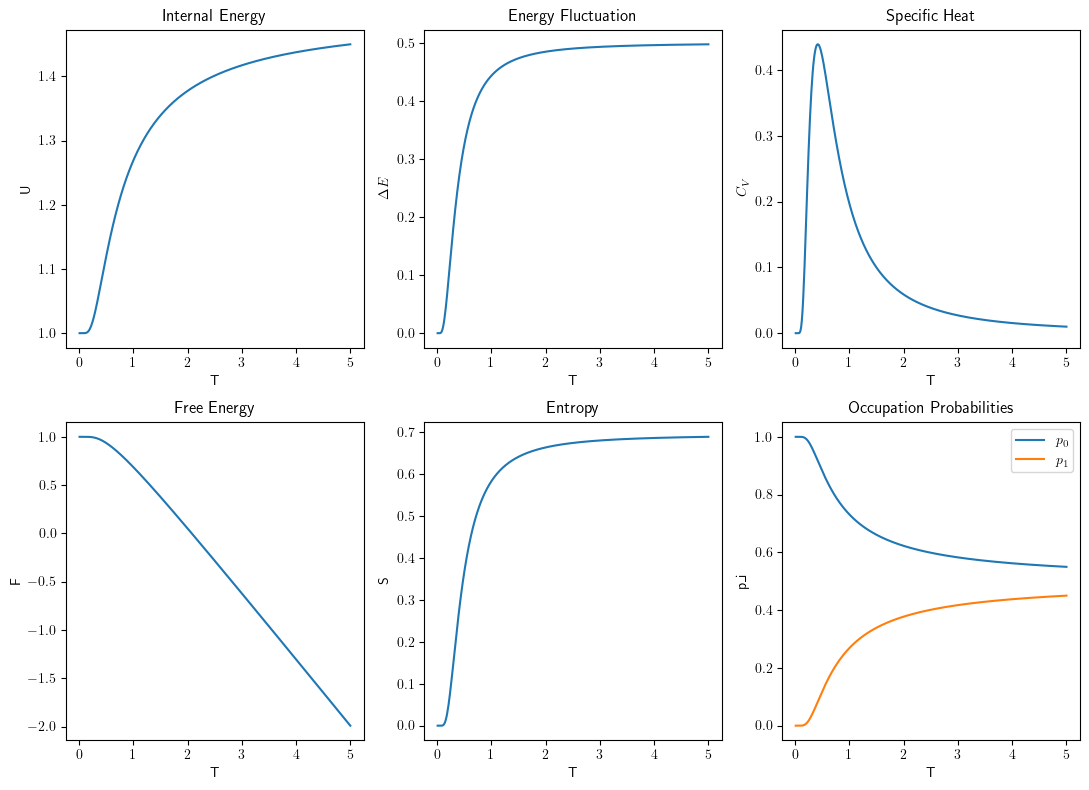

In [2]:
kB = 1.0
epsilon = 1.0    

def beta_of_T(T): return 1.0 / (kB * T)

def Z(beta):
    return np.exp(-beta*epsilon) + np.exp(-2*beta*epsilon)

def p0(beta):
    z = Z(beta)
    return np.exp(-beta*epsilon) / z

def p1(beta):
    z = Z(beta)
    return np.exp(-2*beta*epsilon) / z

def U(beta):
    z = Z(beta)
    return (epsilon * np.exp(-beta*epsilon) + 2*epsilon * np.exp(-2*beta*epsilon)) / z

def E2(beta):
    z = Z(beta)
    return (epsilon**2 * np.exp(-beta*epsilon) + (2*epsilon)**2 * np.exp(-2*beta*epsilon)) / z

def deltaE(beta):
    return np.sqrt(E2(beta) - U(beta)**2)

def Cv(beta, T):
    return (deltaE(beta)**2) / (kB * T**2)

def F(beta, T):
    return -kB * T * np.log(Z(beta))

def S(beta, T):
    return (U(beta) - F(beta, T)) / T
    #return - (p0(beta)*np.log(p0(beta)) + p1(beta)*np.log(p1(beta))) * kB

T = np.linspace(0.01, 5.0, 400)
beta = 1.0 / (kB * T)
U_vals = np.array([U(b) for b in beta])
dE_vals = np.array([deltaE(b) for b in beta])
Cv_vals = np.array([Cv(b, T[i]) for i, b in enumerate(beta)])
F_vals = np.array([F(b, T[i]) for i, b in enumerate(beta)])
S_vals = np.array([S(b, T[i]) for i, b in enumerate(beta)])
p0_vals = np.array([p0(b) for b in beta])
p1_vals = np.array([p1(b) for b in beta])

plt.figure(figsize=(11,8))
plt.subplot(231)
plt.plot(T, U_vals)
plt.xlabel('T'); plt.ylabel('U'); plt.title('Internal Energy')

plt.subplot(232)
plt.plot(T, dE_vals)
plt.xlabel('T'); plt.ylabel(r'$\Delta E$'); plt.title('Energy Fluctuation')

plt.subplot(233)
plt.plot(T, Cv_vals)
plt.xlabel('T'); plt.ylabel(r'$C_V$'); plt.title('Specific Heat')

plt.subplot(234)
plt.plot(T, F_vals)
plt.xlabel('T'); plt.ylabel('F'); plt.title('Free Energy')

plt.subplot(235)
plt.plot(T, S_vals)
plt.xlabel('T'); plt.ylabel('S'); plt.title('Entropy')

plt.subplot(236)
plt.plot(T, p0_vals, label='$p_0$')
plt.plot(T, p1_vals, label='$p_1$')
plt.xlabel('T'); plt.ylabel('p_i'); plt.title('Occupation Probabilities')
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:red">**Question 2**

<span style="color:red">Consider a quantum harmonic oscillator with energy levels
$$
E_n = \hbar\omega\left(n+\tfrac{1}{2}\right),\qquad n=0,1,2,\dots
$$
Take $\hbar\omega = 1$ (so $E_n = n+\tfrac{1}{2}$). Treat the system in the canonical ensemble.

1. <span style="color:red">Write a Python function to compute the canonical partition function
   $$
   Z(\beta)=\sum_{n=0}^{\infty} e^{-\beta E_n}
   $$
   (use $\beta = 1/(k_B T)$; take $k_B=1$ units or include $k_B$ explicitly).                                                                                  
   <span style="color:red">Show that $Z$ can be written in closed form and verify numerically by summing many terms.

3. <span style="color:red">Calculate and plot the following quantities as functions of $k_B T$ (or $T$ in units where $k_B=1$):

   * (a) <span style="color:red">Internal energy $U(\beta)=\langle E\rangle$,                                                                                                          
   * (b) <span style="color:red">Energy fluctuation $\Delta E = \sqrt{\langle E^2\rangle - \langle E\rangle^2}$,                                                                       
   * (c) <span style="color:red">Heat capacity $C_V = \partial U/\partial T$,                                                                                                                
   * (d) <span style="color:red">Helmholtz free energy $F = -k_B T \ln Z$,                                                                                                         
   * (e) <span style="color:red">Entropy $S = (U - F)/T$.

4. <span style="color:red">Compute and plot the occupation probabilities $p_n = e^{-\beta E_n}/Z$ for the first few levels (e.g., $n=0\ldots 10$) as a function of temperature.

5. <span style="color:red">Compare analytic formulas with numeric sums to show convergence.

Given $\hbar\omega=1$ and $k_B=1$

The geometric-series sum gives the closed form:

$$
Z(\beta) = \sum_{n=0}^\infty e^{-\beta (n+1/2)} = e^{-\beta/2}\sum_{n=0}^\infty (e^{-\beta})^n
= \frac{e^{-\beta/2}}{1-e^{-\beta}}.
$$

From this:

* Free energy:

  $$
  F(\beta) = -\frac{1}{\beta}\ln Z(\beta) = -\frac{1}{\beta}\left(-\frac{\beta}{2} -\ln(1-e^{-\beta})\right)
  = \frac{1}{2} + \frac{1}{\beta}\ln(1-e^{-\beta}).
  $$
* Internal energy:

  $$
  U(\beta) = -\frac{\partial}{\partial \beta}\ln Z(\beta)
  = \frac{1}{2} + \frac{1}{e^{\beta}-1}.
  $$

  (Or equivalently the familiar Bose result $U=\tfrac{1}{2}+\tfrac{1}{2}\coth(\beta/2)$; the above is simpler with $\hbar\omega=1$.)
* $\langle E^2\rangle$ can be obtained by

  $$
  \langle E^2\rangle = \frac{1}{Z}\sum_n E_n^2 e^{-\beta E_n}.
  $$

  You can evaluate it either by analytic differentiation of $\ln Z$ twice:

  $$
  \frac{\partial^2}{\partial\beta^2}\ln Z = \langle E\rangle^2 - \langle E^2\rangle,
  $$

  then compute $\Delta E = \sqrt{\langle E^2\rangle - \langle E\rangle^2}$.
* Heat capacity:

  $$
  C_V = \frac{dU}{dT} = \beta^2(\langle E^2\rangle - \langle E\rangle^2)
  \quad(\text{with } \beta=1/T,\,k_B=1).
  $$
* Entropy:

  $$
  S = \frac{U-F}{T}.
  $$

* At **low temperature** $T\ll 1$ (in our units), the oscillator occupies mostly the ground state $n=0$: $U\to 1/2$, $S\to 0$, $C_V\to 0$.
* At **high temperature** $T\gg 1$, equipartition leads to $U\sim T$ (classical limit), $C_V\to 1$ (since in these units each quadratic degree gives 1/2 and two degrees give 1), and entropy grows ~$\ln T$.
* The numerical sum over $n$ converges quickly because $e^{-\beta E_n}$ decays geometrically when $\beta>0$; choose `nmax` large enough (e.g. 300–1000) for very low $T$.


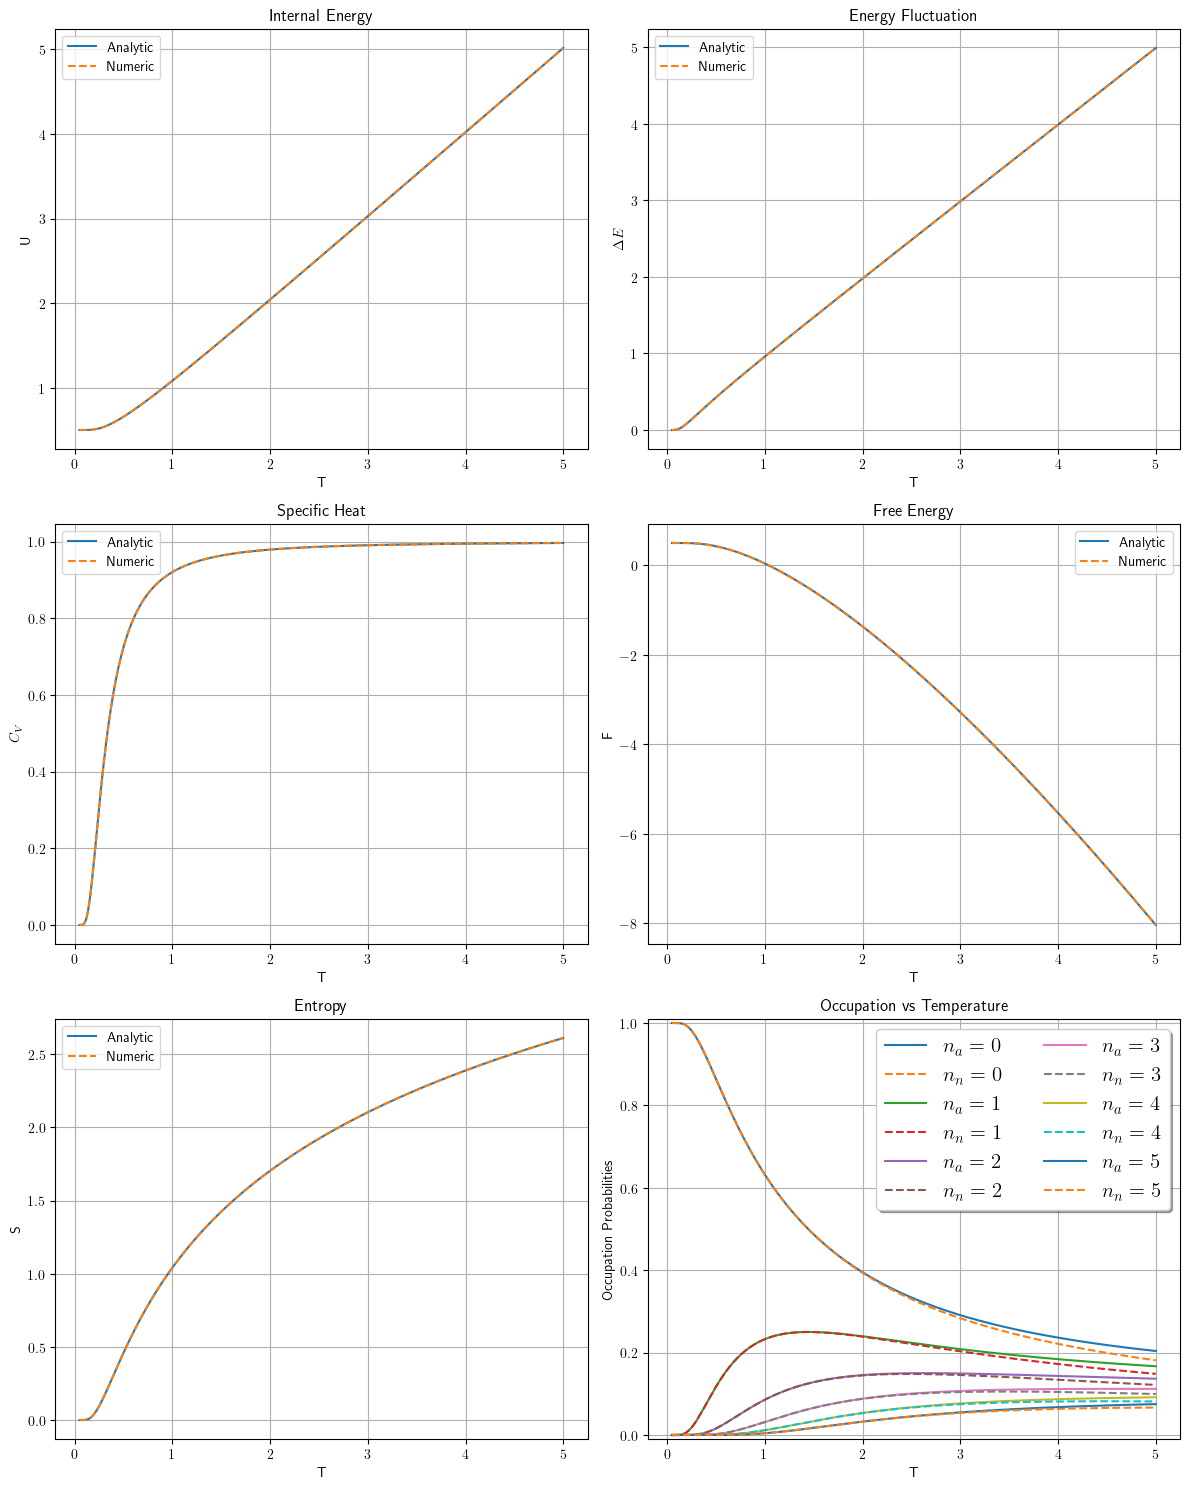

In [3]:
def Z_analytic(beta):
    return np.exp(-0.5*beta*hw) / (1 - np.exp(-beta*hw))

def U_analytic(beta):
    return 0.5*hw + hw / (np.exp(beta*hw) - 1)

def E2_analytic(beta):
    return U_analytic(beta)**2 + (hw**2 * np.exp(beta*hw)) / ((np.exp(beta*hw) - 1)**2)

def fluctuation_analytic(beta):
    return np.sqrt(E2_analytic(beta) - U_analytic(beta)**2)

def Cv_analytic(beta, T):
    return (fluctuation_analytic(beta)**2) / (kB * T**2)

def F_analytic(beta, T):
    return -kB * T * np.log(Z_analytic(beta))

def S_analytic(beta, T):
    return (U_analytic(beta) - F_analytic(beta, T)) / T

def occupations_analytic(beta, n_levels=10):
    n = np.arange(0, n_levels+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Zs = np.sum(expo, axis=1)[:, None]
    return expo / Zs

def Z_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    return np.sum(np.exp(-np.outer(beta, En)), axis=1)

def U_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Z = np.sum(expo, axis=1)[:, None]
    return np.sum(En * expo, axis=1) / Z.flatten()

def E2_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Z = np.sum(expo, axis=1)[:, None]
    return np.sum((En**2) * expo, axis=1) / Z.flatten()

def fluctuation_numeric(beta, nmax=100):
    return np.sqrt(E2_numeric(beta, nmax) - U_numeric(beta, nmax)**2)

def Cv_numeric(beta, T, nmax=100):
    return (fluctuation_numeric(beta, nmax)**2) / (kB * T**2)

def F_numeric(beta, T, nmax=100):
    return -kB * T * np.log(Z_numeric(beta, nmax))

def S_numeric(beta, T, nmax=100):
    U = U_numeric(beta, nmax)
    F = F_numeric(beta, T, nmax)
    return (U - F) / T

def occupations_numeric(beta, n_levels=10, nmax=100):
    n = np.arange(0, n_levels+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Zs = np.sum(np.exp(-np.outer(beta, np.arange(0,nmax+1)*hw + 0.5*hw)), axis=1)[:, None]
    return expo / Zs

kB = 1.0
hw = 1.0
nmax = 200  # number of levels for numeric sum
T = np.linspace(0.05, 5.0, 400)
beta = 1.0 / (kB * T)

U_a = U_analytic(beta)
U_n = U_numeric(beta)

DeltaE_a = fluctuation_analytic(beta)
DeltaE_n = fluctuation_numeric(beta)

Cv_a = Cv_analytic(beta, T)
Cv_n = Cv_numeric(beta, T)

F_a = F_analytic(beta, T)
F_n = F_numeric(beta, T)

S_a = S_analytic(beta, T)
S_n = S_numeric(beta, T)

p_n_a = occupations_analytic(beta)
p_n_n = occupations_numeric(beta)

plt.figure(figsize=(12, 15))

plt.subplot(321)
plt.plot(T, U_a, label='Analytic')
plt.plot(T, U_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('U'); plt.title('Internal Energy')
plt.legend(); plt.grid(True)

plt.subplot(322)
plt.plot(T, DeltaE_a, label='Analytic')
plt.plot(T, DeltaE_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel(r'$\Delta E$'); plt.title('Energy Fluctuation')
plt.legend(); plt.grid(True)

plt.subplot(323)
plt.plot(T, Cv_a, label='Analytic')
plt.plot(T, Cv_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel(r'$C_V$'); plt.title('Specific Heat')
plt.legend(); plt.grid(True)

plt.subplot(324)
plt.plot(T, F_a, label='Analytic')
plt.plot(T, F_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('F'); plt.title('Free Energy')
plt.legend(); plt.grid(True)

plt.subplot(325)
plt.plot(T, S_a, label='Analytic')
plt.plot(T, S_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('S'); plt.title('Entropy')
plt.legend(); plt.grid(True)

plt.subplot(326)
n_levels = 5
for j in range(n_levels+1):
    plt.plot(T, p_n_a[:, j], label=rf"$n_a={j}$")
    plt.plot(T, p_n_n[:, j], '--', label=rf"$n_n={j}$")
plt.xlabel('T'); plt.ylabel('Occupation Probabilities')
plt.title('Occupation vs Temperature')
plt.legend( loc='upper right', fancybox=True, shadow=True, ncol=2, fontsize=15)
plt.ylim(-0.01,1.01)
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:red">**Question 3**

<span style="color:red">Write a function to generate a canonical partition function
$$
Z = \sum e^{-\beta E_i},
$$
where
$$
E_i = \sum \epsilon_k, \quad \epsilon_k = k \gamma
$$
for a system of $n$ fermions distributed in $N$ single-particle levels.
($n$ and $N$ are arbitrary input variables.)

<span style="color:red">Use the `combinations` function in Python’s `itertools` module to generate all possible fermionic configurations.

<span style="color:red">Perform the calculations and plots of the thermodynamic parameters mentioned in Question No. 1:

1. <span style="color:red">Internal energy $U$,
2. <span style="color:red">Energy fluctuation $\Delta E$,
3. <span style="color:red">Specific heat at constant volume $C_V$,
4. <span style="color:red">Free energy $F$,
5. <span style="color:red">Entropy $S$.



We want to calculate the **canonical partition function**

$$
Z(\beta) = \sum_{\{i\}} e^{-\beta E_i}
$$

where

* $E_i = \sum \epsilon_k$ is the total energy of a configuration,
* $\epsilon_k = k \gamma$ is the single-particle energy of the $k$-th level,
* $n$ fermions distributed among $N$ levels (so **Pauli exclusion applies**: each level at most one fermion).

Thus, possible many-body states are just **all combinations of $n$ distinct levels out of $N$**.

We then compute thermodynamic quantities as before:

* **Internal energy** : $$U = -\frac{\partial \ln Z}{\partial \beta}$$
* **Free energy** : $$F = -k_B T \ln Z$$
* **Entropy** : $$S = \frac{(U - F)}{T}$$
* **Specific heat** : $$C_V = \frac{\partial U}{\partial T}$$
* **Energy fluctuation** : $$\Delta E^2 = k_B^2 T^2 C_V$$.


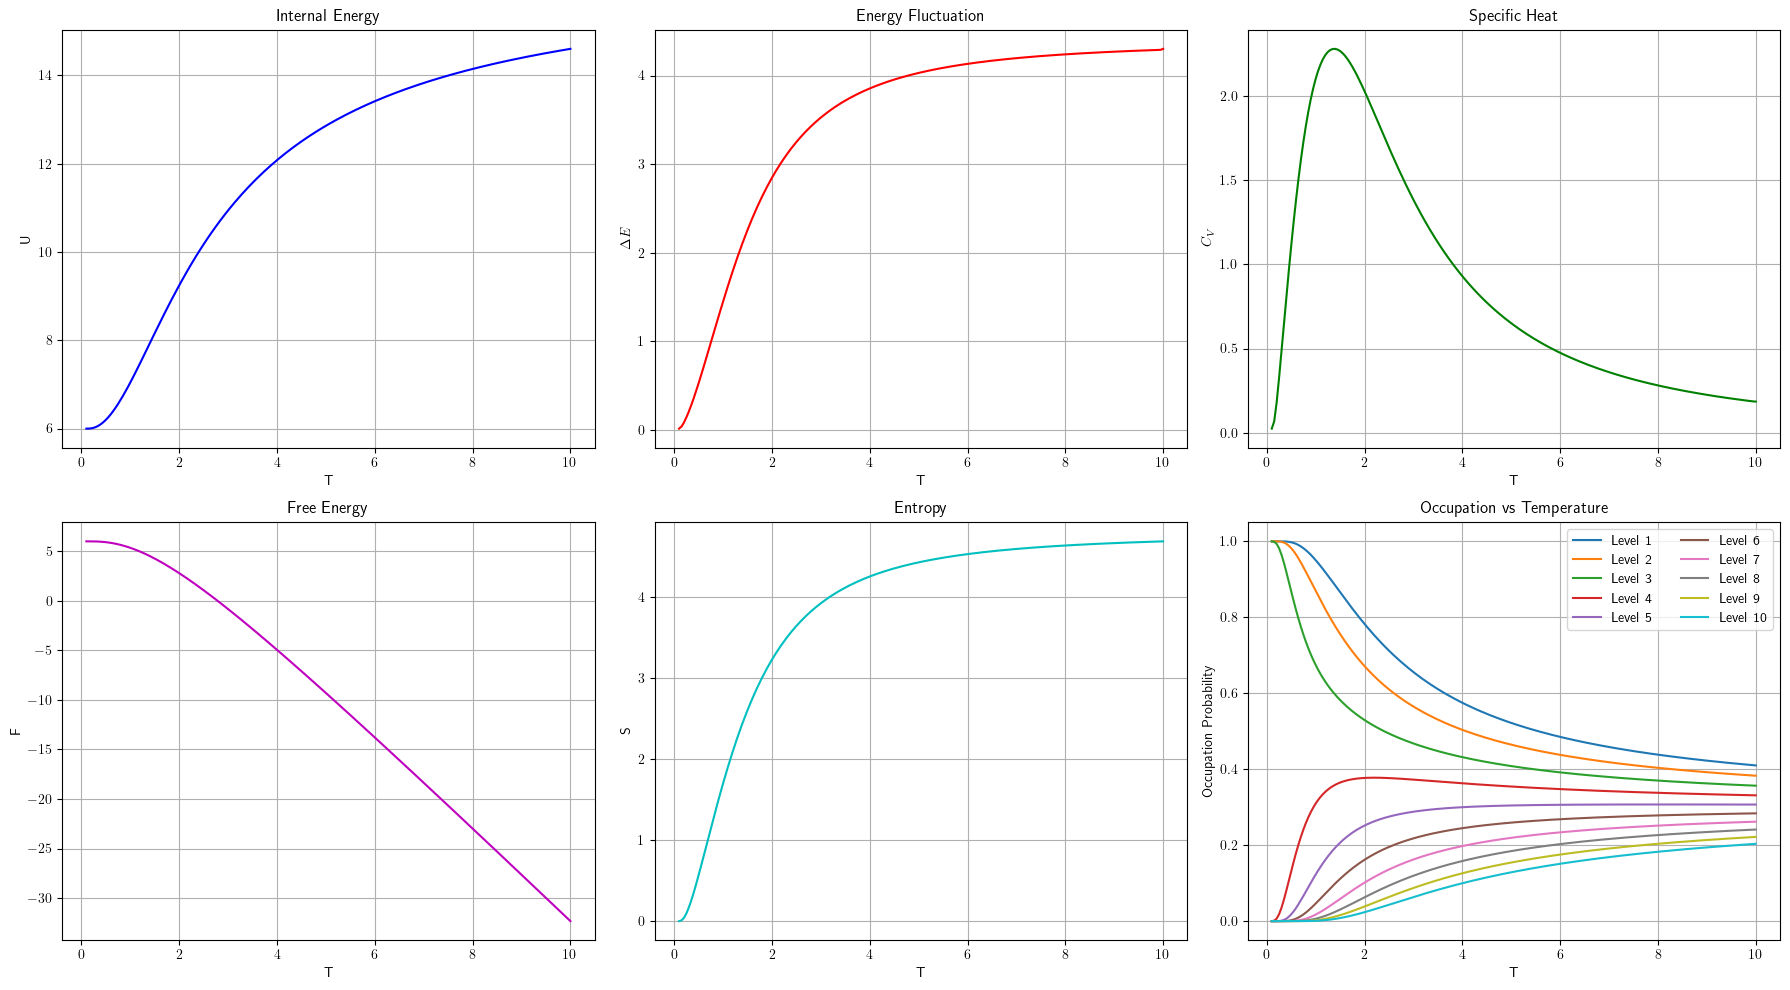

In [4]:
from itertools import combinations
 
N = 10        # Number of single-particle levels
n = 3         # Number of fermions
k = 1         # Boltzman const
gamma = 1.0   # Energy spacing between levels
T = np.linspace(0.1, 10, 200)  # Temperature array
beta = 1.0 / (k * T)
eps = np.arange(1, N+1) * gamma # Single-particle energies

# Each configuration: n occupied levels out of N
configs = list(combinations(eps, n))
E_config = np.array([sum(c) for c in configs])  # Total energy of each configuration

Z = np.array([np.sum(np.exp(-b * E_config)) for b in beta]) # Partition function
U = np.array([np.sum(E_config * np.exp(-b * E_config)) / np.sum(np.exp(-b * E_config)) for b in beta])  # Internal energy 
F = -kB * T * np.log(Z)  # Free energy 
S = ((U - F) / T)        # Entropy
Cv = np.gradient(U, T)   # Specific heat
DeltaE = np.sqrt(kB**2 * T**2 * Cv) # Energy fluctuation

# Occupation probabilities for each level
p_occupation = np.zeros((len(T), N))     # p_i(T) = average occupation of level i
for i, b in enumerate(beta):
    weights = np.exp(-b * E_config)
    Zb = np.sum(weights)
    for lvl in range(N):
        # Count number of configurations where this level is occupied
        occ = np.array([1 if eps[lvl] in c else 0 for c in configs])
        p_occupation[i, lvl] = np.sum(occ * weights) / Zb


plt.figure(figsize=(18,10))

plt.subplot(231)
plt.plot(T, U, 'b')
plt.xlabel('T'); plt.ylabel('U'); plt.title('Internal Energy'); plt.grid(True)

plt.subplot(232)
plt.plot(T, DeltaE, 'r')
plt.xlabel('T'); plt.ylabel(r'$\Delta E$'); plt.title('Energy Fluctuation'); plt.grid(True)

plt.subplot(233)
plt.plot(T, Cv, 'g')
plt.xlabel('T'); plt.ylabel(r'$C_V$'); plt.title('Specific Heat'); plt.grid(True)

plt.subplot(234)
plt.plot(T, F, 'm')
plt.xlabel('T'); plt.ylabel('F'); plt.title('Free Energy'); plt.grid(True)

plt.subplot(235)
plt.plot(T, S, 'c')
plt.xlabel('T'); plt.ylabel('S'); plt.title('Entropy'); plt.grid(True)

plt.subplot(236)
for lvl in range(N):
    plt.plot(T, p_occupation[:, lvl], label=f'Level {lvl+1}')
plt.xlabel('T'); plt.ylabel('Occupation Probability')
plt.title('Occupation vs Temperature')
plt.legend(ncol=2, fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:red">**Question 4**

<span style="color:red">Generate a list of microstates of n bosons distributed in N levels. (n and N are arbitrary input variables) 

In [5]:
from itertools import combinations_with_replacement

def boson_microstates(n, N):
    states = []
    for c in combinations_with_replacement(range(N), n):
        occ = [0]*N
        for i in c:
            occ[i] += 1
        states.append(tuple(occ))
    return states

microstates = boson_microstates(3, 2)
print("Number of microstates:", len(microstates))
for state in microstates:
    print(state)

Number of microstates: 4
(3, 0)
(2, 1)
(1, 2)
(0, 3)


<span style="color:red">**Question 5**
  
<span style="color:red">Calculate the canonical partition function of **2 bosons** in **three energy levels** $(\epsilon, 2\epsilon, 3\epsilon)$ as a function of temperature        
and then compute the thermodynamic properties listed in **Question No. 1**:

1. <span style="color:red">Internal energy $U$
2. <span style="color:red">Energy fluctuation $\Delta E$
3. <span style="color:red">Specific heat at constant volume $C_V$
4. <span style="color:red">Free energy $F$
5. <span style="color:red">Entropy $S$

 <span style="color:red">**Important condition**: Manual listing of the two-particle energy levels should be avoided.                                                                           
 <span style="color:red">You may use the **program written in the previous question** (for generating boson microstates).

 <span style="color:red">For numerical work, the use of `scipy.constants` is encouraged.



* **System**: 2 bosons in **3 single-particle energy levels**:

  $$
  \epsilon_1 = \epsilon,\quad \epsilon_2 = 2\epsilon,\quad \epsilon_3 = 3\epsilon
  $$

* Generate microstates of 2 bosons in 3 levels (using the function from the previous step).

* For each microstate, compute the **total energy** $E = \sum_k n_k \epsilon_k$.

* Compute the **canonical partition function**:

  $$
  Z(\beta) = \sum_{\text{microstates}} e^{-\beta E}
  $$

* Compute thermodynamic properties from $Z$:

  * **Free energy** :

    $$
    F = -k_B T \ln Z
    $$
  * **Mean energy** :

    $$
    U = -\frac{\partial \ln Z}{\partial \beta}
    $$
  * **Entropy** :

    $$
    S = \frac{U - F}{T}
    $$
  * **Heat capacity** :

    $$
    C_V = \frac{\partial U}{\partial T}
    $$


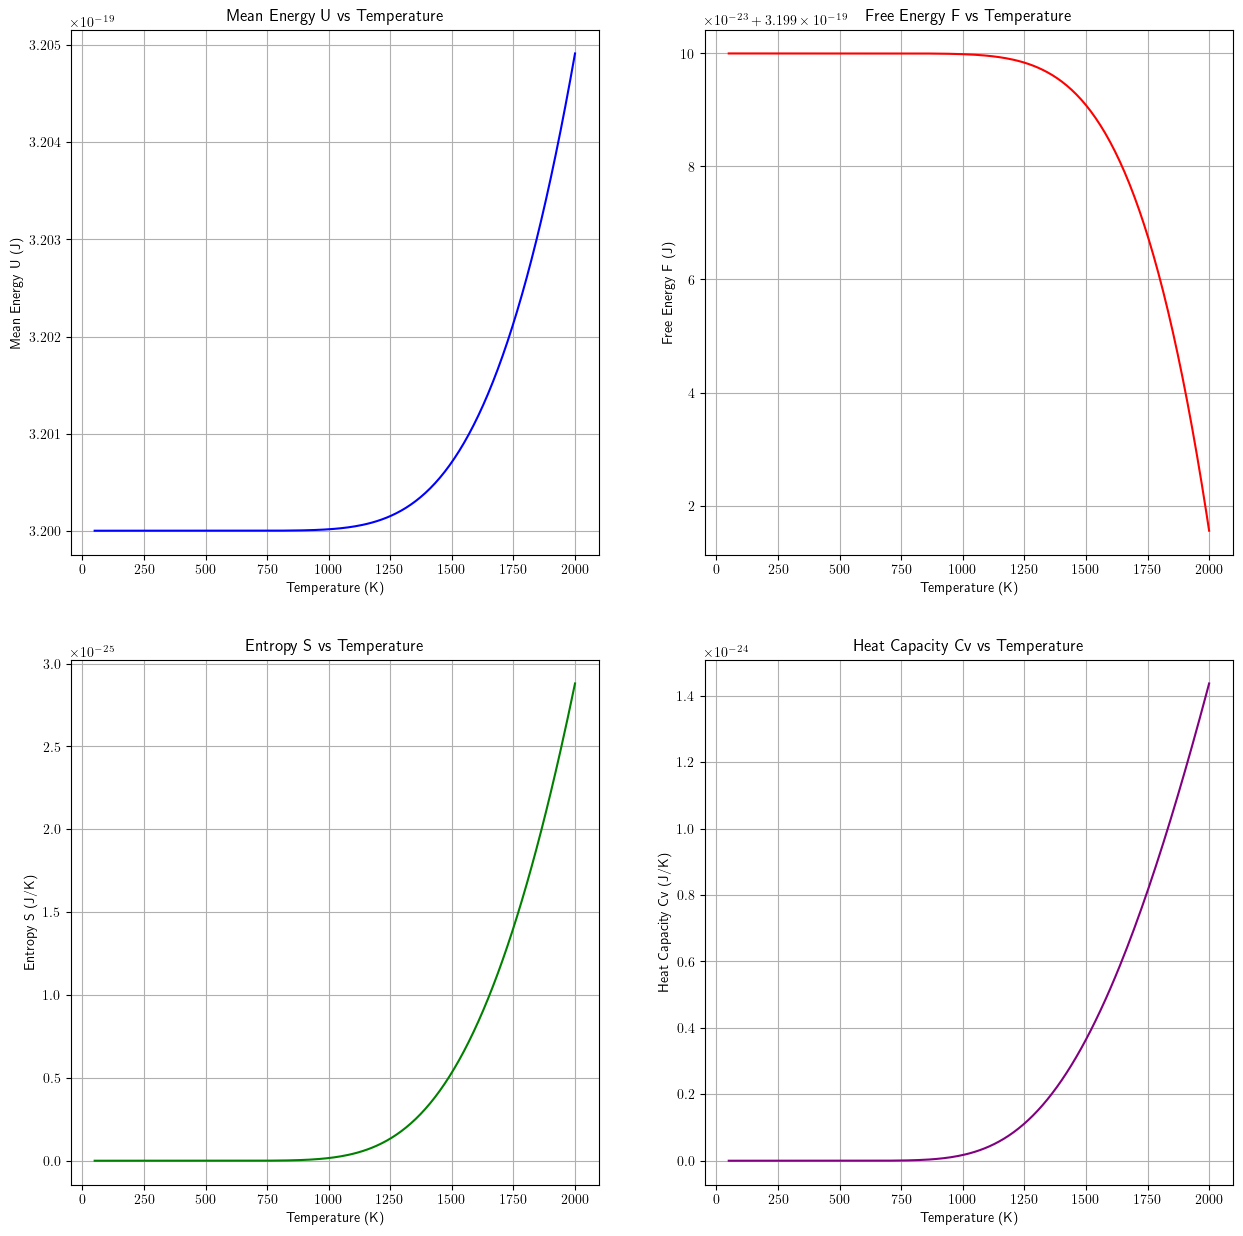

In [6]:
from itertools import combinations_with_replacement
from scipy.constants import Boltzmann

def boson_microstates(n, N):
    states = []
    for c in combinations_with_replacement(range(N), n):
        occ = [0]*N
        for i in c:
            occ[i] += 1
        states.append(tuple(occ))
    return states

def thermodynamics(n, levels, T):
    beta = 1/(Boltzmann*T)
    microstates = boson_microstates(n, len(levels))
    Z = 0.0
    E_avg = 0.0
    E2_avg = 0.0
    
    for state in microstates:
        E = sum(state[i]*levels[i] for i in range(len(levels)))
        w = np.exp(-beta*E)
        Z += w
        E_avg += E*w
        E2_avg += (E**2)*w

    E_avg /= Z
    E2_avg /= Z

    F = -Boltzmann*T*np.log(Z)
    U = E_avg
    S = (U - F)/T
    Cv = (E2_avg - E_avg**2)/(Boltzmann*T**2)

    return Z, F, U, S, Cv

epsilon = 1.0 * 1.6e-19  # 1 eV in J
levels  = [epsilon, 2*epsilon, 3*epsilon]
T_range = np.linspace(50, 2000, 200)  # Temperature range
Z_vals, F_vals, U_vals, S_vals, Cv_vals = [], [], [], [], []

for T in T_range:
    Z, F, U, S, Cv = thermodynamics(2, levels, T)
    Z_vals.append(Z)
    F_vals.append(F)
    U_vals.append(U)
    S_vals.append(S)
    Cv_vals.append(Cv)

plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.plot(T_range, U_vals, color='blue')
plt.xlabel("Temperature (K)")
plt.ylabel("Mean Energy U (J)")
plt.title("Mean Energy U vs Temperature")
plt.grid(True)

plt.subplot(222)
plt.plot(T_range, F_vals, color='red')
plt.xlabel("Temperature (K)")
plt.ylabel("Free Energy F (J)")
plt.title("Free Energy F vs Temperature")
plt.grid(True)

plt.subplot(223)
plt.plot(T_range, S_vals, color='green')
plt.xlabel("Temperature (K)")
plt.ylabel("Entropy S (J/K)")
plt.title("Entropy S vs Temperature")
plt.grid(True)

plt.subplot(224)
plt.plot(T_range, Cv_vals, color='purple')
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity Cv (J/K)")
plt.title("Heat Capacity Cv vs Temperature")
plt.grid(True)
plt.show()


<span style="color:red">**Problem 6**

1. <span style="color:red">Plot Planck’s law for blackbody radiation and the Rayleigh-Jeans law superposed on the same graph for temperatures $T = 4000\,\text{K}$ and $T = 8000\,\text{K}$.                                                                                                                                                 
Use the frequency range $\nu \in [1, 15 k_BT/h]$ (units consistent with constants).

2. <span style="color:red">For both temperatures, determine the frequency at which the energy density is maximum.                                                                      
Identify the region of the electromagnetic spectrum corresponding to these frequencies.

3. <span style="color:red">Calculate the minimum frequency $\nu_\text{c}$ at $T = 300\,\text{K}$ where the difference between the energy densities                                  
predicted by Planck’s law and the Rayleigh-Jeans law is at least 10% (i.e., $\frac{|u_{\tiny \text{Planck}} - u_{\tiny \text{RJ}}|}{u_{\tiny \text{Planck}}} \ge 0.1$).

4. <span style="color:red">Calculate the total energy in the visible spectrum ($\nu = 4 \times 10^{14}$ Hz to $7.5 \times 10^{14}$ Hz) for $T \in [100, 400]$ K by direct numerical integration.                                                                                                                                                 
Plot the visible energy as a function of temperature.


1. **Planck’s law** (spectral energy density per unit frequency):

$$
u_\text{Planck}(\nu, T) = \frac{8 \pi h \nu^3}{c^3} \frac{1}{\exp(h\nu/k_B T) - 1}
$$

2. **Rayleigh-Jeans law**:

$$
u_\text{RJ}(\nu, T) = \frac{8 \pi \nu^2 k_B T}{c^3}
$$

Where:

* $h = 6.626\times10^{-34}\,\mathrm{J\cdot s}$ (Planck constant)
* $k_B = 1.381\times10^{-23}\,\mathrm{J/K}$ (Boltzmann constant)
* $c = 3\times10^8\,\mathrm{m/s}$ (speed of light)


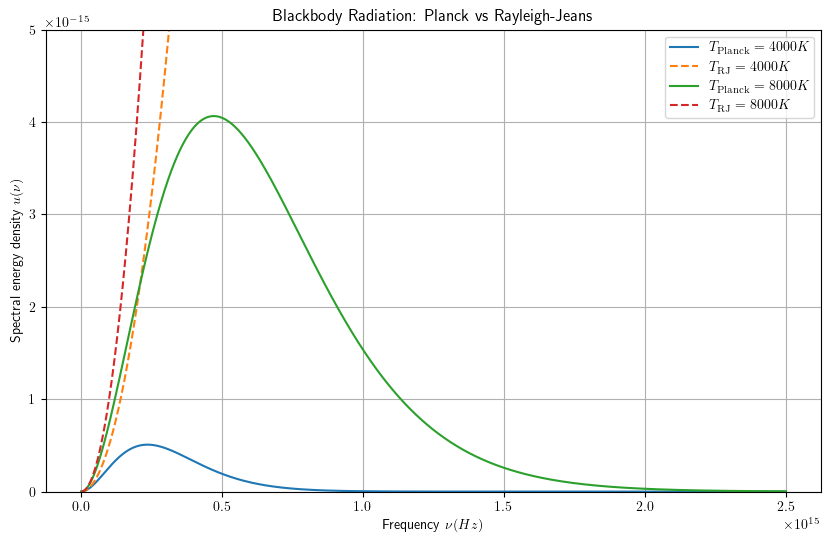

T=4000 K: Peak frequency = 2.35e+14 Hz
T=8000 K: Peak frequency = 4.70e+14 Hz
Minimum frequency ν_c where difference >=10%: 1.18e+12 Hz


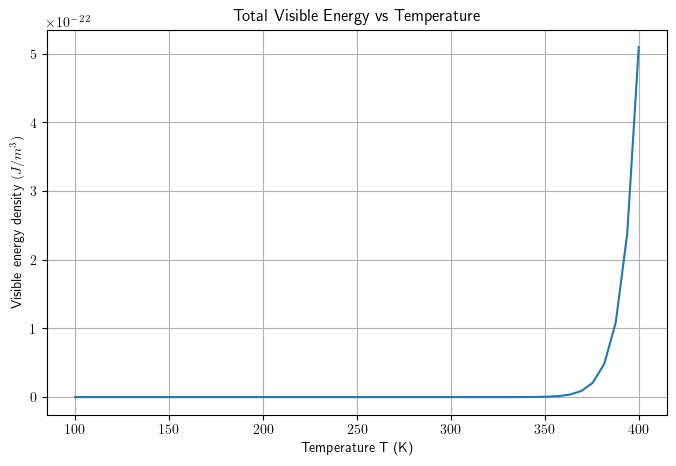

In [7]:
from scipy.optimize import fminbound
from scipy.integrate import quad


h = 6.626e-34       # Planck constant, J.s
kB = 1.381e-23      # Boltzmann constant, J/K
c = 3e8             # Speed of light, m/s

def u_planck(nu, T):
    return (8*np.pi*h*nu**3/c**3) / (np.exp(h*nu/(kB*T)) - 1)

def u_RJ(nu, T):
    return (8*np.pi*nu**2*kB*T/c**3)

# Part 1: Plot for T=4000 K and 8000 K
T_vals = [4000, 8000]
nu_max = 15 * kB * max(T_vals)/h
nu = np.linspace(1, nu_max, 1000)

plt.figure(figsize=(10,6))
for T in T_vals:
    plt.plot(nu, u_planck(nu,T), label=rf'$T_{{\rm Planck}}={T}K$')
    plt.plot(nu, u_RJ(nu,T), '--', label=rf'$T_{{\rm RJ}}={T}K$')
plt.xlabel(r'Frequency $\nu (Hz)$')
plt.ylabel(r'Spectral energy density $u(\nu)$')
plt.title('Blackbody Radiation: Planck vs Rayleigh-Jeans')
plt.legend()
plt.grid(True)
plt.ylim([0, 0.05e-13])
plt.show()

# Part 2: Find frequency at maximum energy density
def max_freq_planck(T):
    nu_max = fminbound(lambda nu: -u_planck(nu,T), 0, 1e15)
    return nu_max

for T in T_vals:
    nu_peak = max_freq_planck(T)
    print(f"T={T} K: Peak frequency = {nu_peak:.2e} Hz")

# Part 3: Minimum frequency where |u_planck - u_RJ|/u_planck >= 0.1 at T=300K
T_c = 300
nu_test = np.linspace(1e10, 1e14, 10000)
diff = np.abs(u_planck(nu_test, T_c) - u_RJ(nu_test, T_c)) / u_planck(nu_test, T_c)
nu_c = nu_test[np.where(diff >= 0.1)[0][0]]
print(f"Minimum frequency ν_c where difference >=10%: {nu_c:.2e} Hz")

# Part 4: Total energy in visible spectrum
nu_vis_min = 4e14
nu_vis_max = 7.5e14
T_range = np.linspace(100, 400, 50)
E_vis = []

for T in T_range:
    E, _ = quad(lambda nu: u_planck(nu,T), nu_vis_min, nu_vis_max)
    E_vis.append(E)

plt.figure(figsize=(8,5))
plt.plot(T_range, E_vis)
plt.xlabel('Temperature T (K)')
plt.ylabel(r'Visible energy density $(J/m^3)$')
plt.title('Total Visible Energy vs Temperature')
plt.grid(True)
plt.show()

<span style="color:red">**Problem 7**                                                                                                                       
Plot the **specific heat of solids** as a function of temperature $T$ according to the following models :                                                                                                                   
**(a)** **Dulong-Petit law**                                                                                                                                                                                                                                     
**(b)** **Einstein formula** — take three different values of the Einstein temperature $\theta_E$                                                                                                                                                                         
**(c)** **Debye formula** — take three different values of the Debye temperature $\theta_D$                                                                                                                   
Compare the results graphically.

**(a) Dulong-Petit Law:**

$$
C_V = 3 R
$$

* Constant value independent of $T$
* $R = 8.314\,\mathrm{J/mol\cdot K}$ (gas constant)


**(b) Einstein Model:**

$$
C_V = 3 R \frac{(\theta_E/T)^2 e^{\theta_E/T}}{(e^{\theta_E/T}-1)^2}
$$

* $\theta_E$ = Einstein temperature
* Consider three values: e.g., $\theta_E = 100, 300, 600\,\mathrm{K}$


**(c) Debye Model:**

$$
C_V = 9 R \left(\frac{T}{\theta_D}\right)^3 \int_0^{\theta_D/T} \frac{x^4 e^x}{(e^x - 1)^2} dx
$$

* $\theta_D$ = Debye temperature
* Consider three values: e.g., $\theta_D = 200, 400, 800\,\mathrm{K}$
* Integral is done numerically


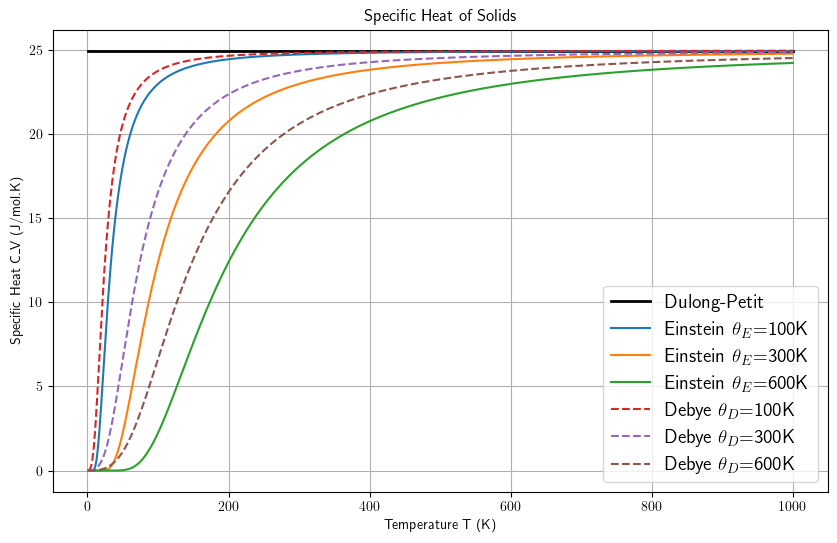

In [8]:
R = 8.314  # J/mol.K
T = np.linspace(1, 1000, 500) # Temperature range

C_DP = 3*R                     # (a) Dulong-Petit Law

theta_E_vals = [100, 300, 600] # (b) Einstein Model

def C_Einstein(T, theta_E):
    x = theta_E / T
    return 3*R * (x**2 * np.exp(x) / (np.exp(x)-1)**2)

theta_D_vals = [100, 300, 600]  # (c) Debye Model

def C_Debye(T, theta_D):
    C = np.zeros_like(T)
    for i, Ti in enumerate(T):
        integrand = lambda x: (x**4 * np.exp(x)) / (np.exp(x)-1)**2
        integral, _ = quad(integrand, 0, theta_D/Ti)
        C[i] = 9*R * (Ti/theta_D)**3 * integral
    return C

plt.figure(figsize=(10,6))

plt.plot(T, [C_DP]*len(T), label='Dulong-Petit', color='black', linewidth=2)

for theta_E in theta_E_vals:
    plt.plot(T, C_Einstein(T, theta_E), label=rf'Einstein $\theta_E$={theta_E}K')

for theta_D in theta_D_vals:
    plt.plot(T, C_Debye(T, theta_D), '--', label=rf'Debye $\theta_D$={theta_D}K')

plt.xlabel('Temperature T (K)')
plt.ylabel('Specific Heat C_V (J/mol.K)')
plt.title('Specific Heat of Solids')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

<span style="color:red">**Problem 8**                                                                                                                         
 Plot the following functions with energy at different temperatures  
   a) Maxwell-Boltzmann distribution ,                                                                              
   b)Fermi-Dirac distribution ,                                                                                           
   c) Bose-Einstein distribution
   

$$\large\displaystyle{f(T,\eta)= \frac{1}{e^{(\epsilon-\mu)e/kT} + \eta} }$$   
   
$$ \large\displaystyle{\begin{equation*} \eta = \left\{\begin{array}{rl}  0 & \text{Maxwell-Boltzmann distribution },\\  1 & \text{Fermi-Dirac distribution },\\ -1 & \text{Bose-Einstein distribution }. \end{array} \right.\end{equation*}}$$

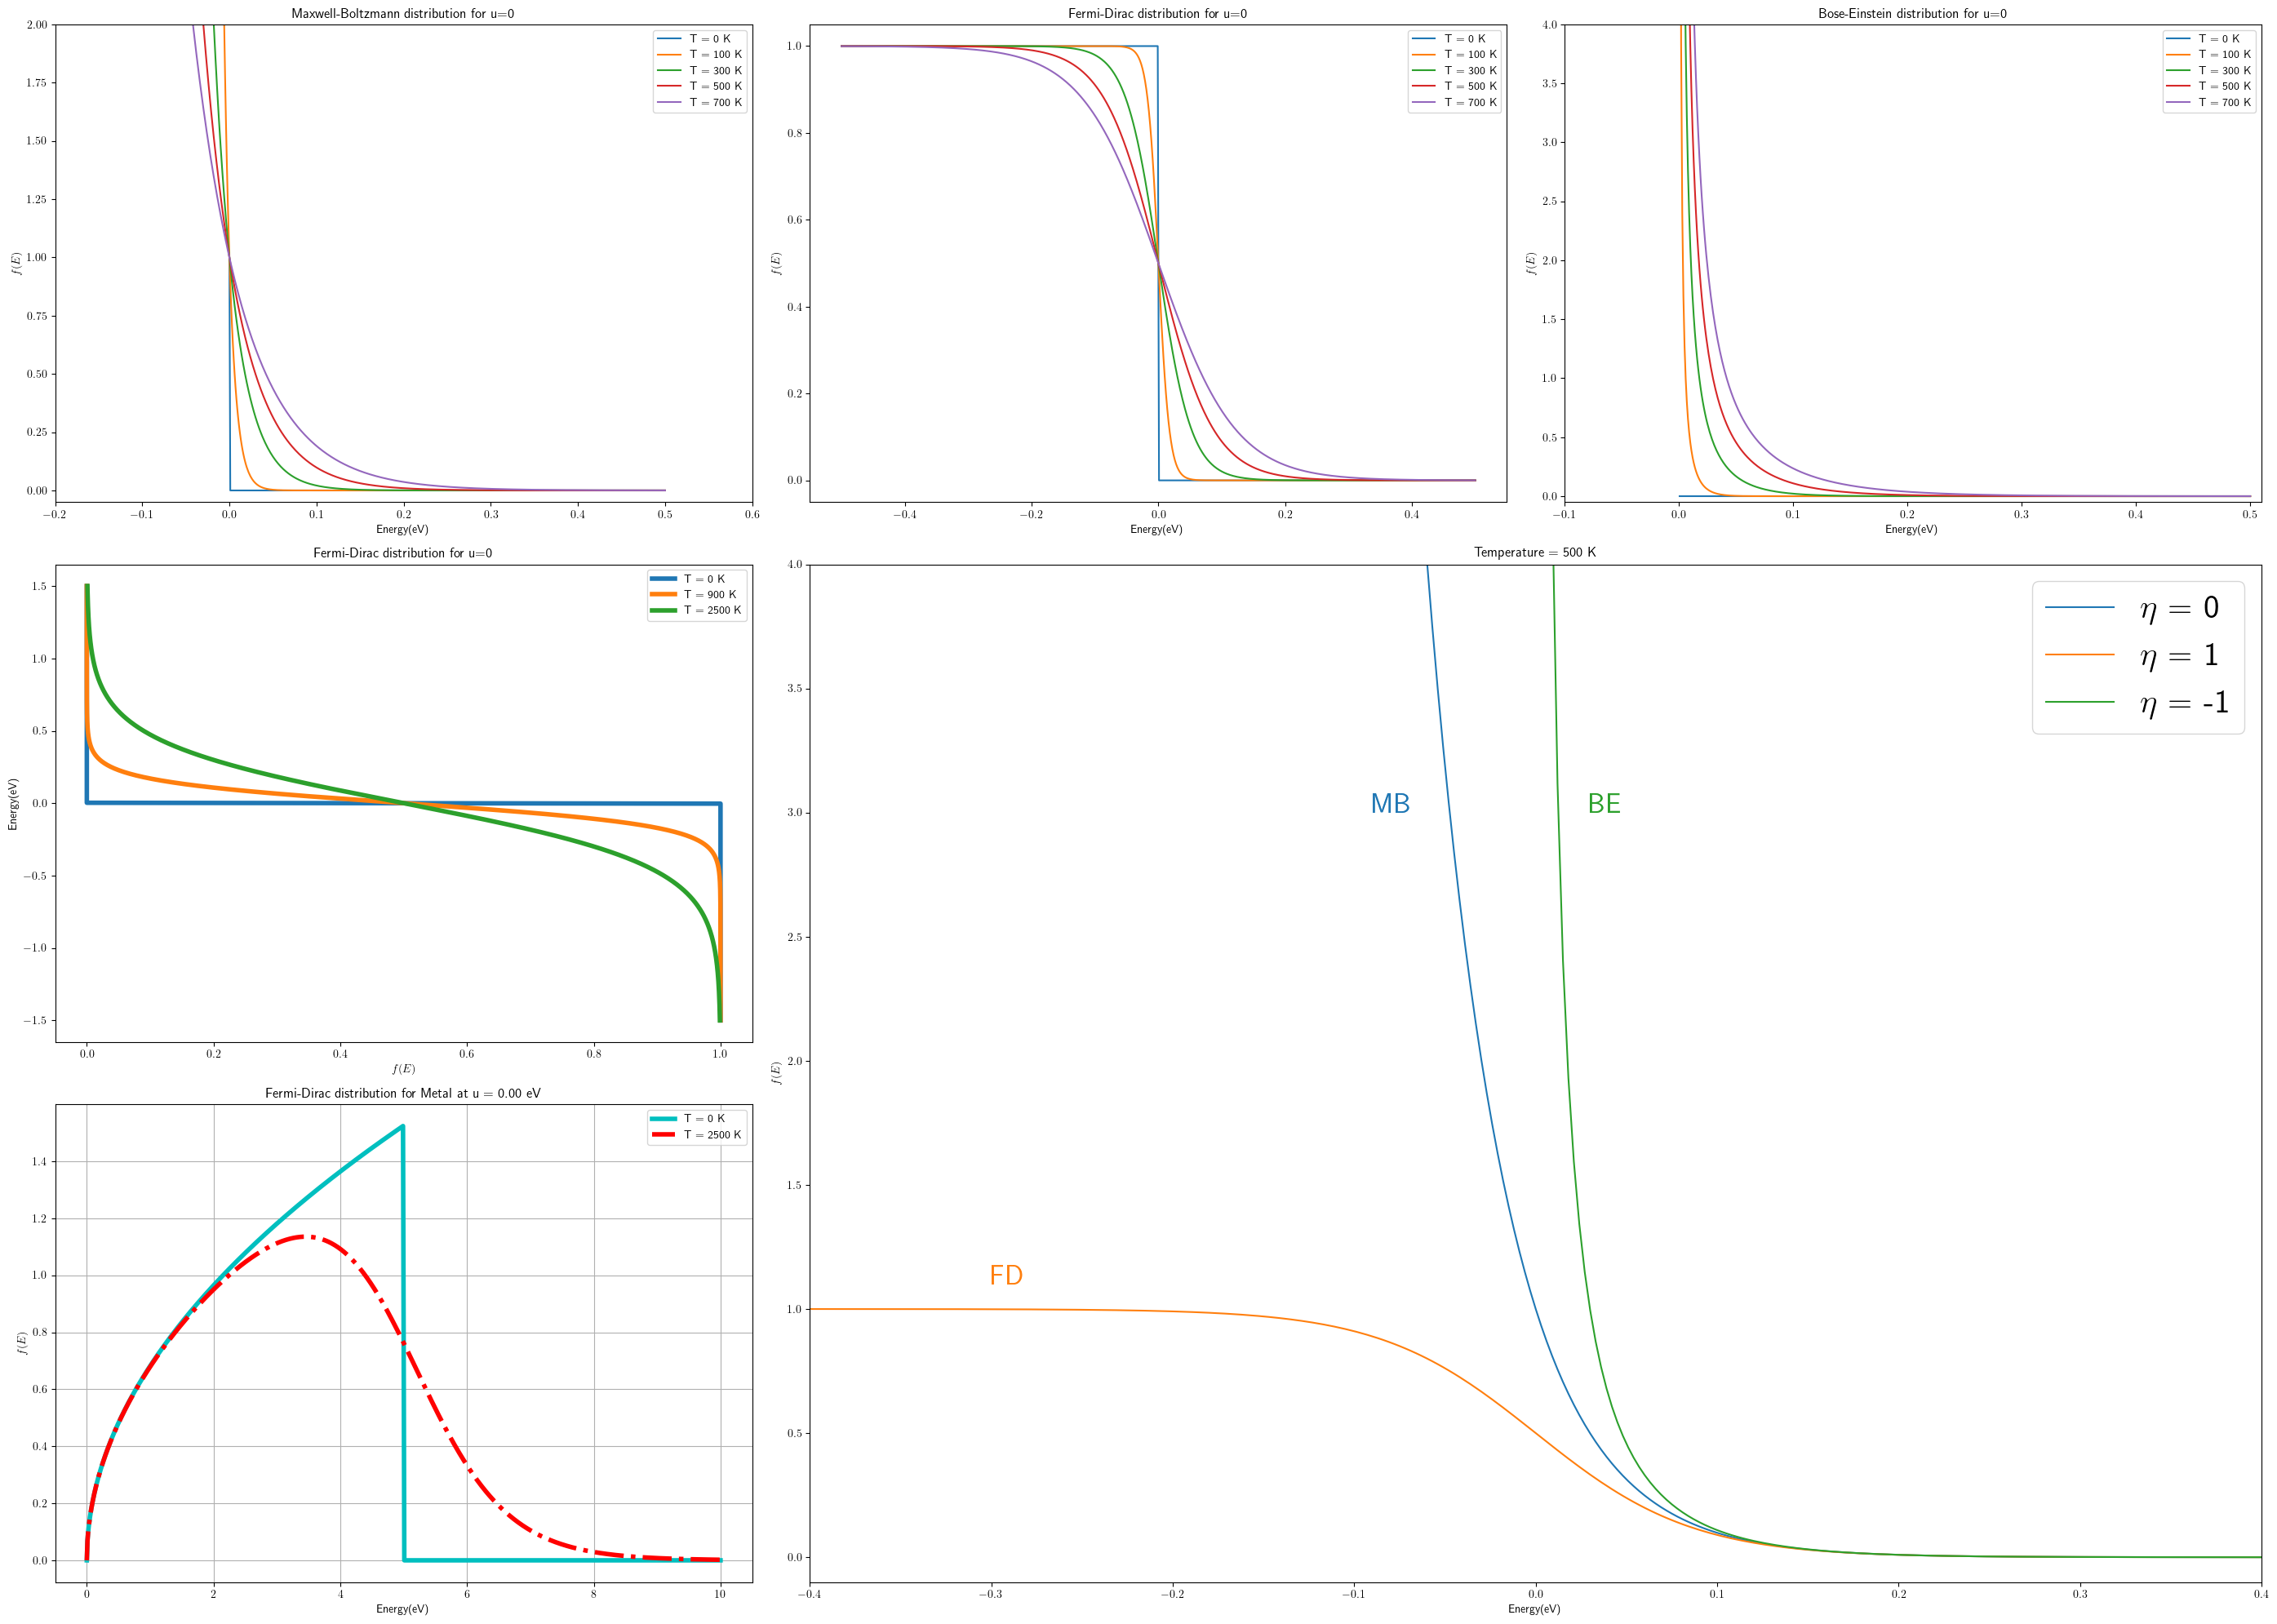

In [9]:
def Fn(T,a):  
    return 1/((np.exp(((E-u)*e)/(k*T)))+a)

E = np.linspace(-0.5,0.5,1001) # energy range  
e = 1.6e-19                    # electric charge  
k = 1.38e-23                   # Boltzmann constant(joule per kelvin)  
u = 0                          # considering chemeical potential of the substance is zero 
T = [0.0001, 100.,300.,500.,700.]
system = [ 0, 1, -1]

fig = plt.figure(figsize=(28,20))
gs = fig.add_gridspec(3,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax4=fig.add_subplot(gs[1,0])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[1:,1:])

for t in T:
    ax1.plot(E,Fn(t,0),label='T = %i K'%t)  
ax1.set_ylim(-0.05,2) 
ax1.set_xlim(-0.2,0.6)  
ax1.set_xlabel('Energy(eV)')  
ax1.set_ylabel('$f(E)$')   
ax1.legend(loc='best')  
ax1.set_title("Maxwell-Boltzmann distribution for u=0") 

for t in T:
    ax2.plot(E,Fn(t,1),label='T = %i K'%t)
ax2.legend(loc='best')  
ax2.set_ylim(-0.05,1.05)  
ax2.set_xlabel('Energy(eV)')  
ax2.set_ylabel('$f(E)$')  
ax2.set_title("Fermi-Dirac distribution for u=0")

for t in T:
    ax3.plot(E,Fn(t,-1),label='T = %i K'%t)   
ax3.set_xlim(-0.1,0.51)  
ax3.set_ylim(-0.05,4)  
ax3.set_xlabel('Energy(eV)')  
ax3.set_ylabel('$f(E)$')  
ax3.legend(loc='best')        
ax3.set_title("Bose-Einstein distribution for u=0")

E = np.linspace(-1.5,1.5,1001)
for t in [0.001,900,2500]:
    ax4.plot(Fn(t,1),E,linewidth=4,label='T = %i K'%t)
ax4.legend(loc='best')  
ax4.set_ylabel('Energy(eV)')  
ax4.set_xlabel('$f(E)$')  
ax4.set_title("Fermi-Dirac distribution for u=0")

E_= np.linspace(0,10,1001)
u_= 5      # E_f
S_= ['c-','r-.']
T_= [0.0001,2500]
for s_,t_ in zip(S_,T_):
    ax5.plot(E_,0.682E28*Fn(t_,1)*E_**0.5/1e28,s_,linewidth=4,label='T = %i K'%t_ )  
ax5.set_xlabel('Energy(eV)')  
ax5.set_ylabel('$f(E)$')   
ax5.legend(loc='best')    
ax5.grid()
ax5.set_title("Fermi-Dirac distribution for Metal at u = %0.2f eV"%u)

for s in system:
    ax6.plot(E,Fn(500,s),label='$\eta$ = %.d '%s)  
ax6.legend(loc='best', fontsize=30)  
ax6.set_ylim(-0.1,4)  
ax6.set_xlim(-0.4,0.4)  
ax6.set_xlabel('Energy(eV)')  
ax6.set_ylabel('$f(E)$')  
ax6.set_title("Temperature = 500 K")
ax6.text(-0.09, 3, "MB", fontsize=25, color="C0")   
ax6.text(-0.3, 1.1, "FD", fontsize=25, color="C1")  
ax6.text(0.03, 3, "BE", fontsize=25, color="C2") 

plt.tight_layout()
plt.show()